Dataset Overview:

Source: Dataset is taken from Kaggle

Duration: The dataset records cyber attacks from January 1, 2020, to October 11, 2023.

Shape: The records cover 40,000 data entries and include 25 different columns.

Columns:

Timestamp: The time at which the network activity occurred.

Source IP Address: The IP address of the sender or initiator of the network traffic.

Destination IP Address: The IP address of the receiver or target of the network traffic.

Source Port: The port number used by the source IP address.

Destination Port: The port number used by the destination IP address.

Protocol: The communication protocol used (e.g., TCP, UDP, ICMP).

Packet Length: The size of the packet in bytes.

Packet Type: Type of packet (e.g., data packet, control packet).

Traffic Type: The type of traffic (e.g., web traffic, email traffic).

Payload Data: The actual data transmitted in the packet.

Malware Indicators: Indicators of potentially malicious activity or presence of malware.

Anomaly Scores: Scores indicating deviations from expected behavior, used for anomaly detection.

Alerts/Warnings: Notifications or warnings generated by security systems or monitoring tools.

Attack Type: Type of attack detected or suspected (e.g., DDoS, SQL injection).

Attack Signature: Specific patterns or signatures associated with known attacks.

Action Taken: Actions performed in response to detected threats or anomalies.

Severity Level: The level of severity associated with an alert or event (e.g., low, medium, high).

User Information: Information about the user involved in the network activity.

Device Information: Information about the device involved in the network activity (e.g., device type, operating system).

Network Segment: The segment or subnet of the network where the activity occurred.

Geo-location Data: Geographical location information associated with IP addresses.

Proxy Information: Information about proxy servers involved in the network communication.

Firewall Logs: Logs generated by firewall devices indicating allowed or blocked traffic.

IDS/IPS Alerts: Alerts generated by Intrusion Detection Systems (IDS) or Intrusion Prevention Systems (IPS) indicating suspicious or malicious activity.

Log Source: The source or origin of the log entry (e.g., name of the logging system or device).logging system or device).


In [29]:
# Import the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px

In [3]:
# load the data
df = pd.read_csv("cybersecurity_attacks.csv")

In [4]:
df.head().T

0  \
Timestamp                                                  5/30/2023 6:33   
Source IP Address                                           103.216.15.12   
Destination IP Address                                       84.9.164.252   
Source Port                                                         31225   
Destination Port                                                    17616   
Protocol                                                             ICMP   
Packet Length                                                         503   
Packet Type                                                          Data   
Traffic Type                                                         HTTP   
Payload Data            Qui natus odio asperiores nam. Optio nobis ius...   
Malware Indicators                                           IoC Detected   
Anomaly Scores                                                      28.67   
Alerts/Warnings                                                       NaN   
Attack Type                                                       Malware   
Attack Signature                                          Known Pattern B   
Action Taken                                                       Logged   
Severity Level                                                        Low   
User Information                                            Reyansh Dugal   
Device Information      Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...   
Network Segment                                                 Segment A   
Geo-location Data                                      Jamshedpur, Sikkim   
Proxy Information                                            150.9.97.135   
Firewall Logs                                                    Log Data   
IDS/IPS Alerts                                                        NaN   
Log Source                                                         Server   

                                                                        1  \
Timestamp                                                  8/26/2020 7:08   
Source IP Address                                          78.199.217.198   
Destination IP Address                                     66.191.137.154   
Source Port                                                         17245   
Destination Port                                                    48166   
Protocol                                                             ICMP   
Packet Length                                                        1174   
Packet Type                                                          Data   
Traffic Type                                                         HTTP   
Payload Data            Aperiam quos modi officiis veritatis rem. Omni...   
Malware Indicators                                           IoC Detected   
Anomaly Scores                                                       51.5   
Alerts/Warnings                                                       NaN   
Attack Type                                                       Malware   
Attack Signature                                          Known Pattern A   
Action Taken                                                      Blocked   
Severity Level                                                        Low   
User Information                                               Sumer Rana   
Device Information      Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...   
Network Segment                                                 Segment B   
Geo-location Data                                      Bilaspur, Nagaland   
Proxy Information                                                     NaN   
Firewall Logs                                                    Log Data   
IDS/IPS Alerts                                                        NaN   
Log Source                                                       Firewall   

                                                                  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [6]:
# Check if there is a null val
df.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

Now let's handle the missing value

In [7]:
#Check for NaN values in 'Alerts/Warnings' column and replace it with 'No Alert Triggered'
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 'No Alert Triggered' if pd.isna(x) else x)

In [8]:
#Check for NaN values in 'Malware Indicators' column and replace it with 'No Detection'
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)

In [9]:
#Check for NaN values in 'Proxy Information' column and replace it with 'No proxy'
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)

In [10]:
#Check for NaN values in 'Firewall Logs' column and replace it with 'No Data'
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'No Data' if pd.isna(x) else x)

In [11]:
#Check for NaN values in 'IDS/IPS Alerts' column and replace it with 'No Data'
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'No Data' if pd.isna(x) else x)

In [12]:
df.isna().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [13]:
# used the value count function for understanding the distribution of devices used to access the system.
df['Device Information'].value_counts()

Device Information
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)                                                                                       35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)                                                                                           34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)                                                                                           33
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)                                                                                       31
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)                                                                                       31
                                                                                                                                                      ..
Mozilla/5.0 (Macintosh; PPC Mac OS X 10_9_2; rv:1.9.2.20) Gecko

The user agent (UA) string is a piece of text information included in every HTTP request sent by a web browser or other web client (like a mobile app or a program that downloads content). It tells the server information about the software that is making the request.

In [14]:
# Extract 'Device' and store it in 'Browser' column
df['Browser'] = df['Device Information'].str.split('/').str[0]

In [15]:
# Identify all the different device types found (from 'Browser' column)
df['Browser'].unique()

array(['Mozilla', 'Opera'], dtype=object)

The re library in Python provides tools for working with regular expressions. Regular expressions are a concise way to define patterns of characters that you want to find or manipulate within text strings.

In [16]:
import re
# List of regular expressions to identify common operating systems and devices
patterns = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh',
]

def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I)  # re.I makes the search case-insensitive
        if match:
            return match.group()
    return 'Unknown'  

In [17]:
# Extract device or OS
df['Device/OS'] = df['Device Information'].apply(extract_device_or_os)

In [18]:
df = df.drop('Device Information', axis = 1)

In [19]:
df['Browser'].value_counts()

Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64

In [20]:
# Group by 'Device/OS' and count the number of attacks
device_counts = df['Device/OS'].value_counts()

# Convert the result to a DataFrame for better readability
device_counts_df = pd.DataFrame(device_counts).reset_index()
device_counts_df.columns = ['Device/OS', 'Count of Attacks']

# Display the top 10 devices/OS by number of attacks
top_devices = device_counts_df.head(10)
print(top_devices)

   Device/OS  Count of Attacks
0    Windows             17953
1      Linux              8840
2  Macintosh              5813
3       iPod              2656
4    Android              1620
5     iPhone              1567
6       iPad              1551


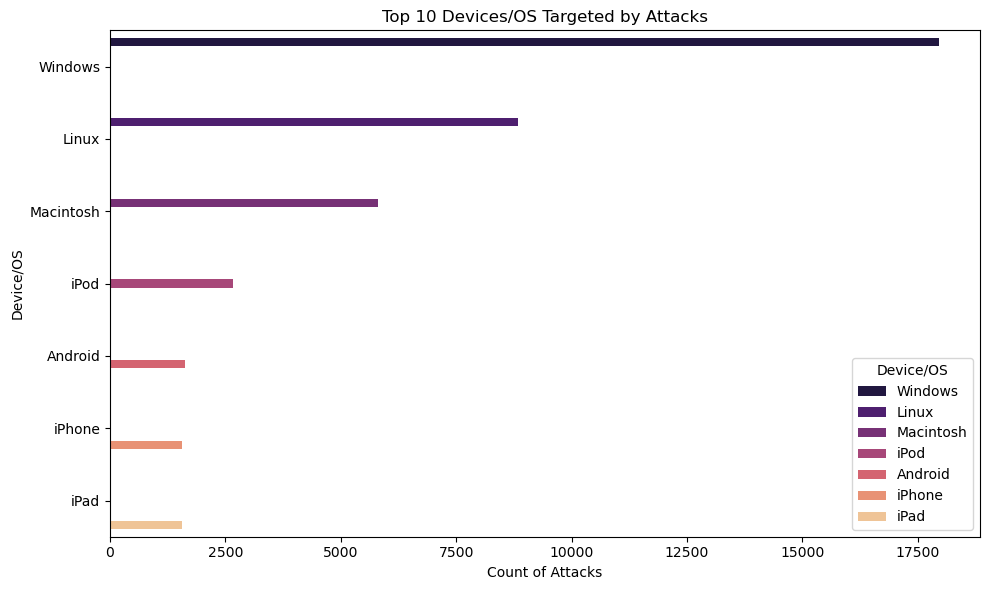

In [21]:
# Plotting the top devices/OS 
plt.figure(figsize=(10, 6))
sns.barplot(x='Count of Attacks', y='Device/OS', hue='Device/OS', data=top_devices, palette='magma')
plt.xlabel('Count of Attacks')
plt.ylabel('Device/OS')
plt.title('Top 10 Devices/OS Targeted by Attacks')
plt.tight_layout()
plt.show()

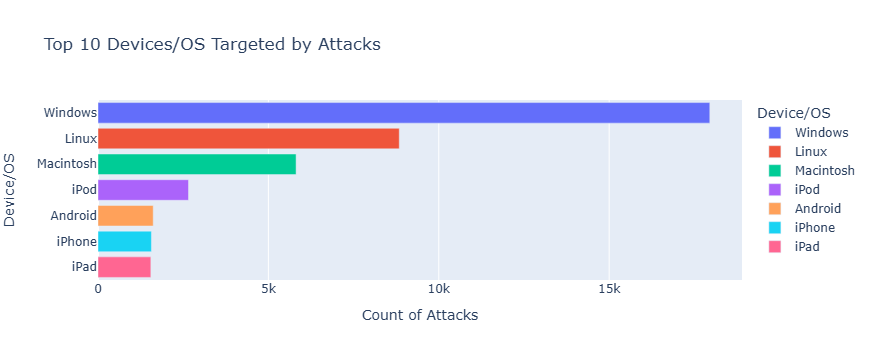

In [22]:
fig = px.bar(top_devices, x='Count of Attacks', y='Device/OS', color='Device/OS', title='Top 10 Devices/OS Targeted by Attacks', orientation='h')
fig.show()

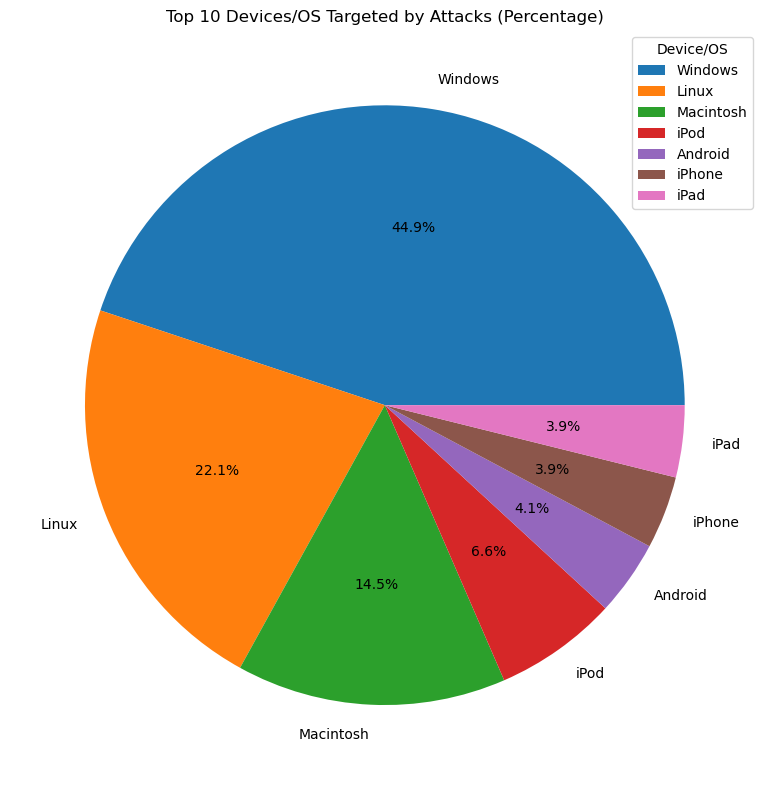

In [23]:
import matplotlib.pyplot as plt

# Assuming 'top_devices' is a DataFrame with columns 'Device/OS' and 'Count of Attacks'

plt.figure(figsize=(8, 8))  # Adjust figure size for pie chart

# Sort data by attack count (descending) for better pie chart presentation
top_devices_sorted = top_devices.sort_values(by='Count of Attacks', ascending=False)

# Create the pie chart
plt.pie(top_devices_sorted['Count of Attacks'], labels=top_devices_sorted['Device/OS'], autopct="%1.1f%%")  # Display percentages with one decimal place
plt.title('Top 10 Devices/OS Targeted by Attacks (Percentage)')

# Add a legend
plt.legend(title='Device/OS')

plt.tight_layout()
plt.show()

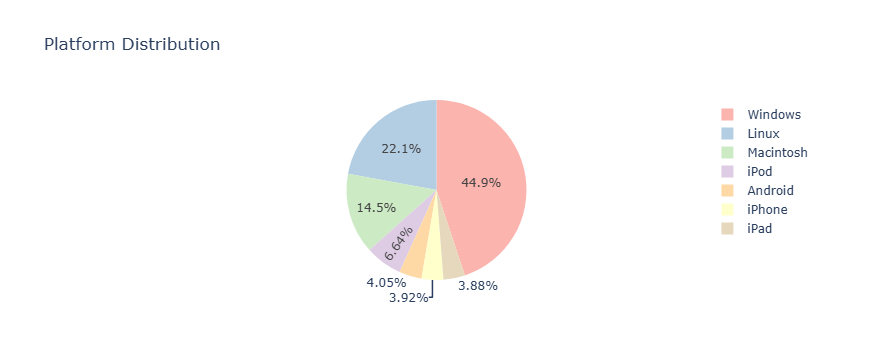

In [24]:
import plotly.express as px

# Assuming you have a column 'count' in your DataFrame representing the count of each device/OS
plt = px.pie(device_counts_df, names='Device/OS', values='Count of Attacks', title='Platform Distribution',
             color_discrete_sequence=px.colors.qualitative.Pastel1
             )
plt.show()

In [25]:
# Calculate attack counts
attack_counts = df['Attack Type'].value_counts().reset_index()
attack_counts.columns = ['Attack Type', 'Count']

# Display the count of the attacks and the attack type
attack_type = attack_counts.head()
print(attack_type)

  Attack Type  Count
0        DDoS  13428
1     Malware  13307
2   Intrusion  13265


1.Malware (Malicious Software):

Malware refers to any type of software intentionally designed to cause damage to a computer, server, network, or device.


Common types of malware include viruses, worms, Trojans, ransomware, spyware, adware, and rootkits.


Malware can steal sensitive information, disrupt normal operations, compromise system security, and cause financial or reputational harm.

Malware is often distributed through email attachments, malicious websites, infected software downloads, or removable media.


2.Intrusion:

In the context of cybersecurity, an intrusion refers to unauthorized access to a computer system, network, or data.

Intrusions can be perpetrated by hackers, malicious insiders, or automated attack tools.


The goal of an intrusion may vary, including data theft, system manipulation, sabotage, espionage, or disruption of services.


Intrusions can take various forms, such as exploiting software vulnerabilities, brute-force attacks, social engineering, or insider threats.


Intrusion detection systems (IDS) and intrusion prevention systems (IPS) are commonly used to detect and mitigate unauthorized access attempts.


3.DDoS (Distributed Denial of Service) Attack:

A DDoS attack is a malicious attempt to disrupt the normal traffic of a targeted server, service, or network by overwhelming it with a flood of Internet traffic.


Unlike traditional DoS attacks, which are carried out from a single source, DDoS attacks involve multiple compromised devices (botnets) distributed across the Internet.

DDoS attacks can target various layers of the network stack, including the application layer, transport layer (e.g., TCP/UDP), and network layer (e.g., ICMP).

The goal of a DDoS attack is to make a website, online service, or network resource unavailable to legitimate users by exhausting its computational resources, bandwidth, or network connectivity.

DDoS attacks can have severe consequences, including financial losses, reputational damage, and disruption of business operations. Organizations often use DDoS mitigation techniques and services to protect against such attacks.


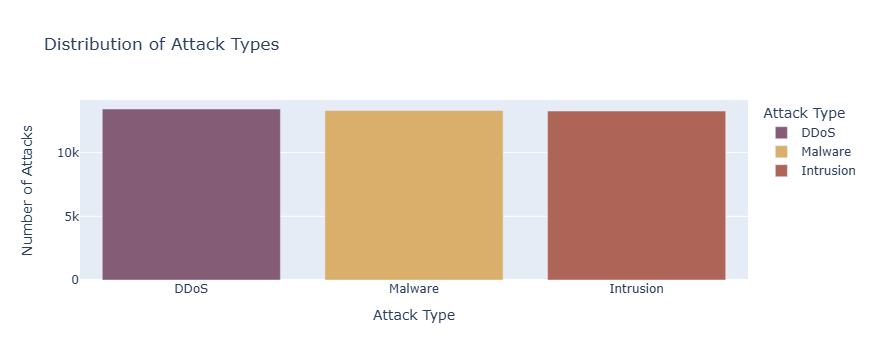

In [26]:

# Calculate attack counts
attack_counts = df['Attack Type'].value_counts().reset_index()
attack_counts.columns = ['Attack Type', 'Count']

# Create the interactive bar chart with a chosen color palette
fig = px.bar(attack_counts, x='Attack Type', y='Count',
             labels={'Count': 'Number of Attacks'},
             title='Distribution of Attack Types',
             color='Attack Type',
             color_discrete_sequence=px.colors.qualitative.Antique)  # Replace with your preferred palette
fig.show()

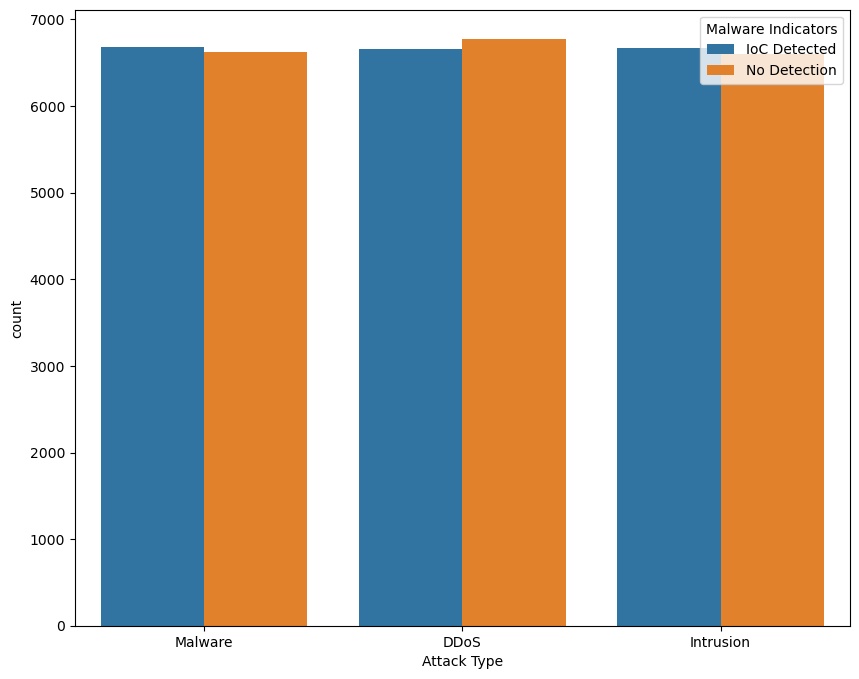

In [30]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x = 'Attack Type', hue = 'Malware Indicators')
plt.show()

In [31]:
# Count the occurrences of each protocol
protocol_counts = df['Protocol'].value_counts().reset_index()
protocol_counts.columns = ['Protocol', 'Count']

# Display the count of the attacks and the attack type
protocol_type = protocol_counts.head()
print(protocol_type)

  Protocol  Count
0     ICMP  13429
1      UDP  13299
2      TCP  13272


1. ICMP (Internet Control Message Protocol):

-ICMP is a protocol used for sending error messages and operational information indicating issues encountered during    packet processing.

-It is primarily used for diagnostic and control purposes.

-ICMP operates at the network layer (Layer 3) of the OSI model.

-Common uses of ICMP include ping (echo request and reply), traceroute, and network error reporting.

2. UDP (User Datagram Protocol):

-UDP is a connectionless transport protocol used for sending datagrams (packets) over an IP network.


-It is known for its simplicity and low overhead.

-UDP operates at the transport layer (Layer 4) of the OSI model.

-UDP is used for applications where speed and efficiency are more critical than reliability, such as real-time multimedia  streaming and online gaming.

3. TCP (Transmission Control Protocol):

-TCP is a connection-oriented transport protocol used for reliable, ordered, and error-checked delivery of data between applications.

-It provides features such as flow control, error recovery, and congestion control.

-TCP operates at the transport layer (Layer 4) of the OSI model.

-TCP is used for applications that require guaranteed delivery of data, such as web browsing, email, and file transfer.

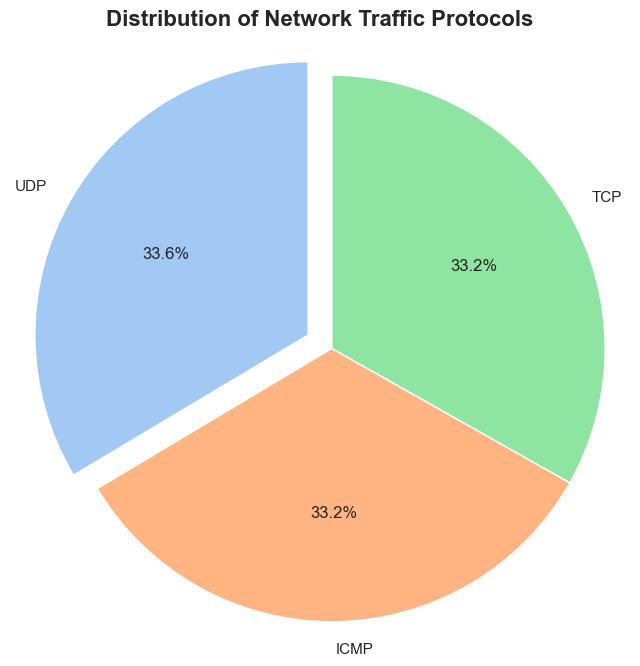

In [32]:
# Data for the pie chart
labels = ['UDP', 'ICMP', 'TCP']
sizes = df['Protocol'].value_counts()  # Proportional sizes of each category
explode = (0.1, 0, 0)  # Explode the 1st slice (UDP) for emphasis

# Set a custom color palette
colors = sns.color_palette('pastel')[0:len(labels)]

# Set seaborn style for a creative theme
sns.set(style="whitegrid")

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of Network Traffic Protocols', fontsize=16, fontweight='bold')

# Display the pie chart
plt.show()

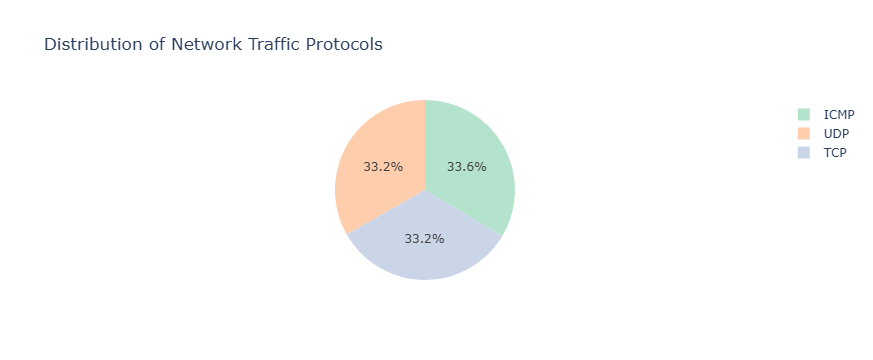

In [33]:
# Count the occurrences of each protocol
protocol_counts = df['Protocol'].value_counts().reset_index()
protocol_counts.columns = ['Protocol', 'Count']

# Create the interactive pie chart
fig = px.pie(protocol_counts, values='Count', names='Protocol', title='Distribution of Network Traffic Protocols',
             color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.show()

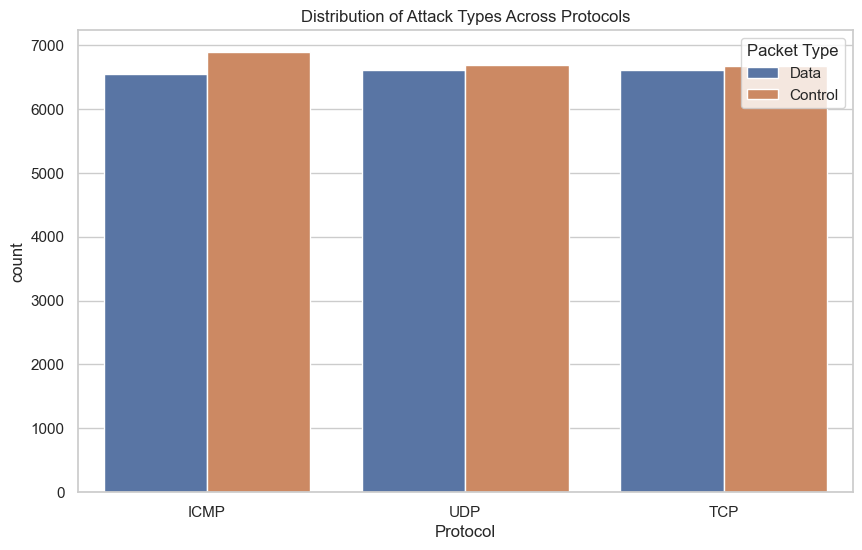

In [34]:
#Correlation Between Attack Types and Protocols
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Protocol', hue='Packet Type')
plt.title('Distribution of Attack Types Across Protocols')
plt.show()

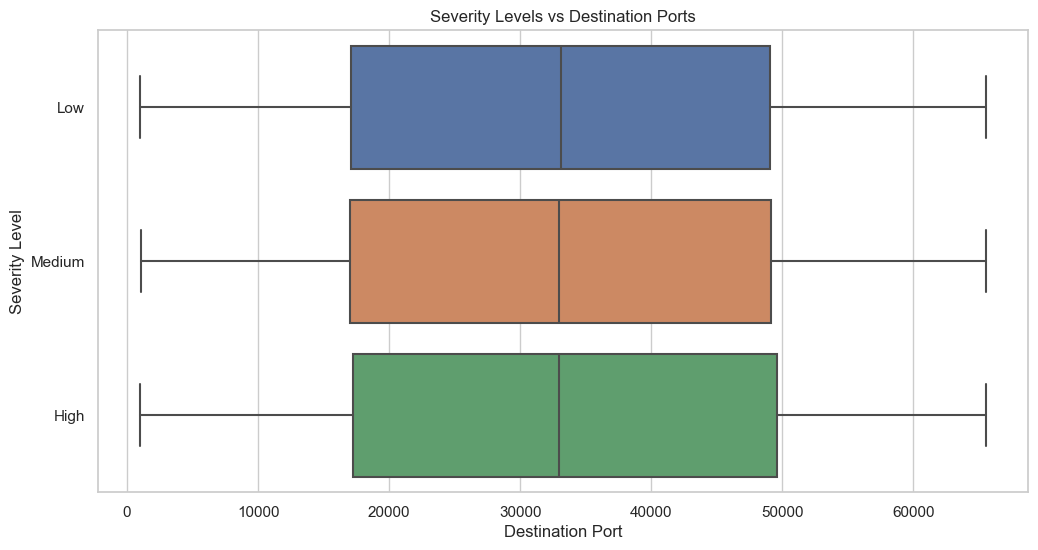

In [35]:
#Severity Levels and Destination Ports
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Destination Port', y='Severity Level')
plt.title('Severity Levels vs Destination Ports')
plt.show()

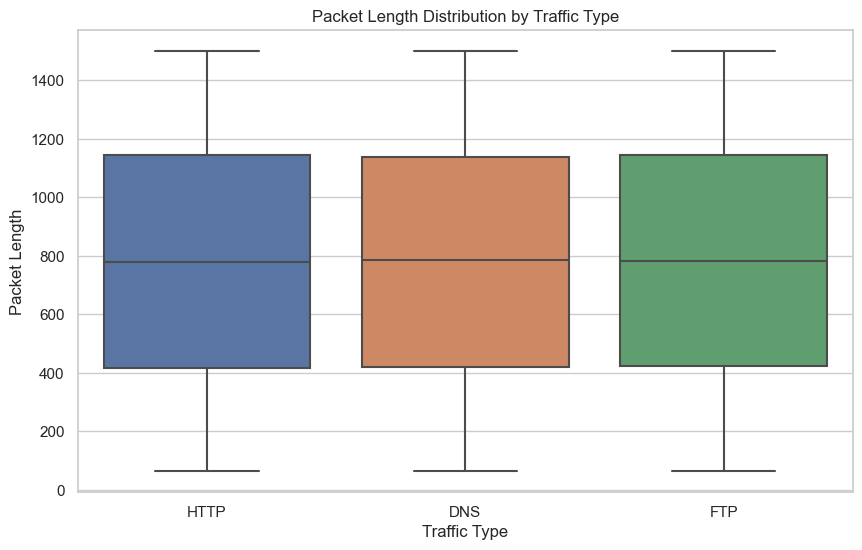

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Traffic Type', y='Packet Length')
plt.title('Packet Length Distribution by Traffic Type')
plt.show()

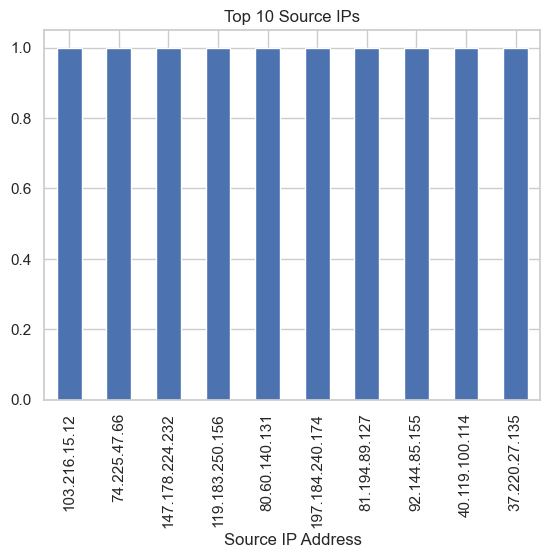

In [37]:
# Analyze source and destination IP address distribution (example)
df["Source IP Address"].value_counts().head(10).plot(kind="bar")  # Top 10 source IPs
plt.title("Top 10 Source IPs")
plt.show()

In [38]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract additional time-based features
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['year'] = df['Timestamp'].dt.year

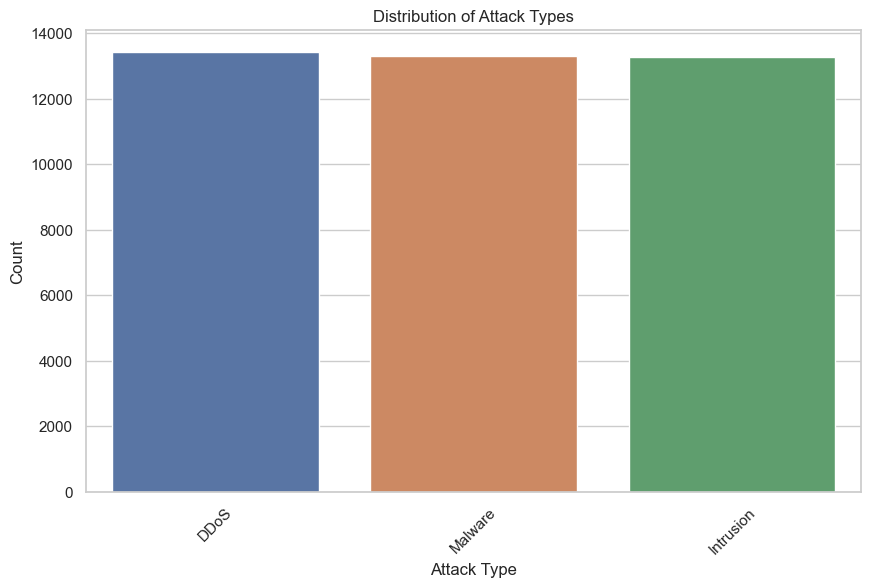

In [39]:
# Plot : Distribution of Attack Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

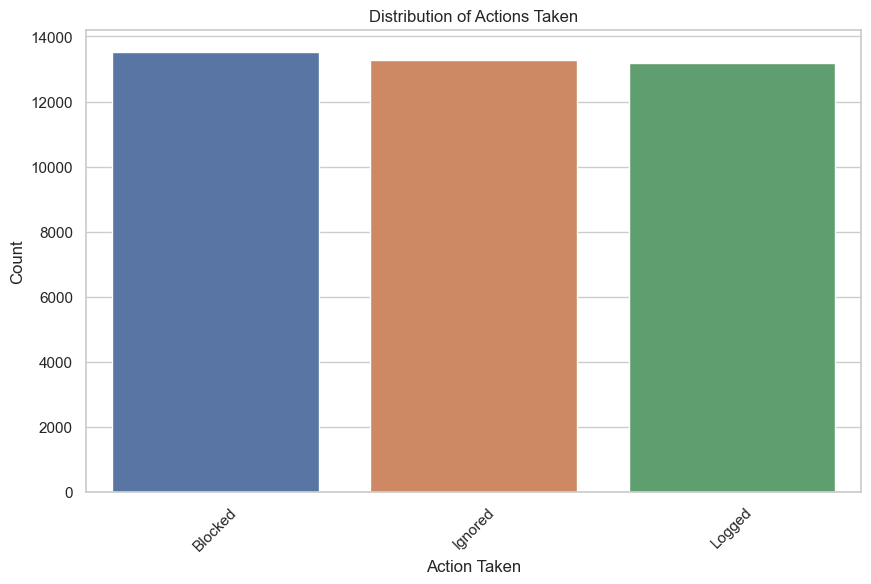

In [40]:
# Plot 2: Distribution of Actions Taken
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Action Taken', order=df['Action Taken'].value_counts().index)
plt.title('Distribution of Actions Taken')
plt.xlabel('Action Taken')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

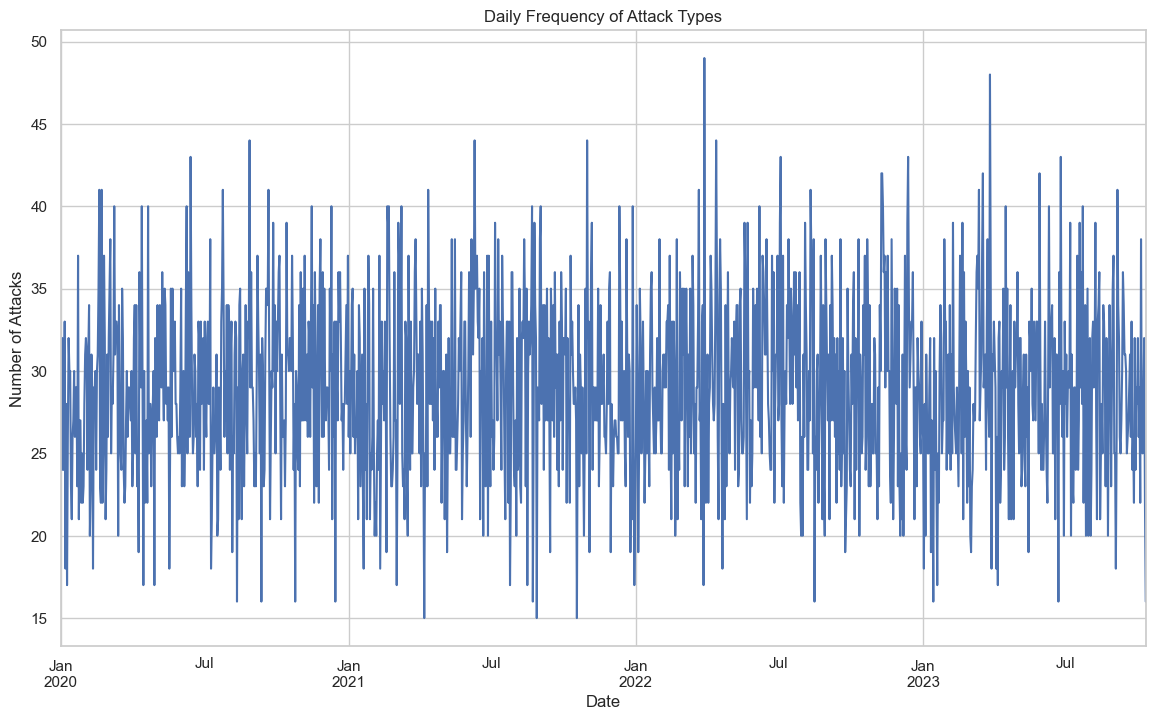

In [41]:
# Plot 3: Time Series of Attack Types
plt.figure(figsize=(14, 8))
df.set_index('Timestamp').resample('D')['Attack Type'].count().plot()
plt.title('Daily Frequency of Attack Types')
plt.xlabel('Date')
plt.ylabel('Number of Attacks')
plt.show()

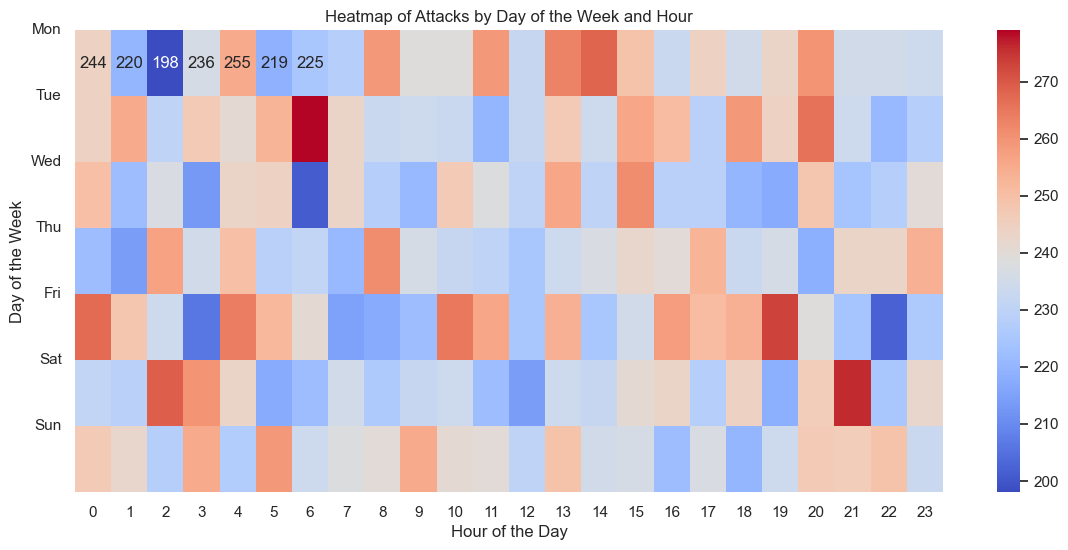

In [42]:
# Plot 4: Heatmap of Attacks by Day of the Week and Hour
pivot_table = df.pivot_table(index='DayOfWeek', columns='Hour', values='Attack Type', aggfunc='count')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d')
plt.title('Heatmap of Attacks by Day of the Week and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

C:\Users\AncAdmin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\AncAdmin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\AncAdmin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\AncAdmin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\AncAdmin\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning:

Converting input from bool to <class 

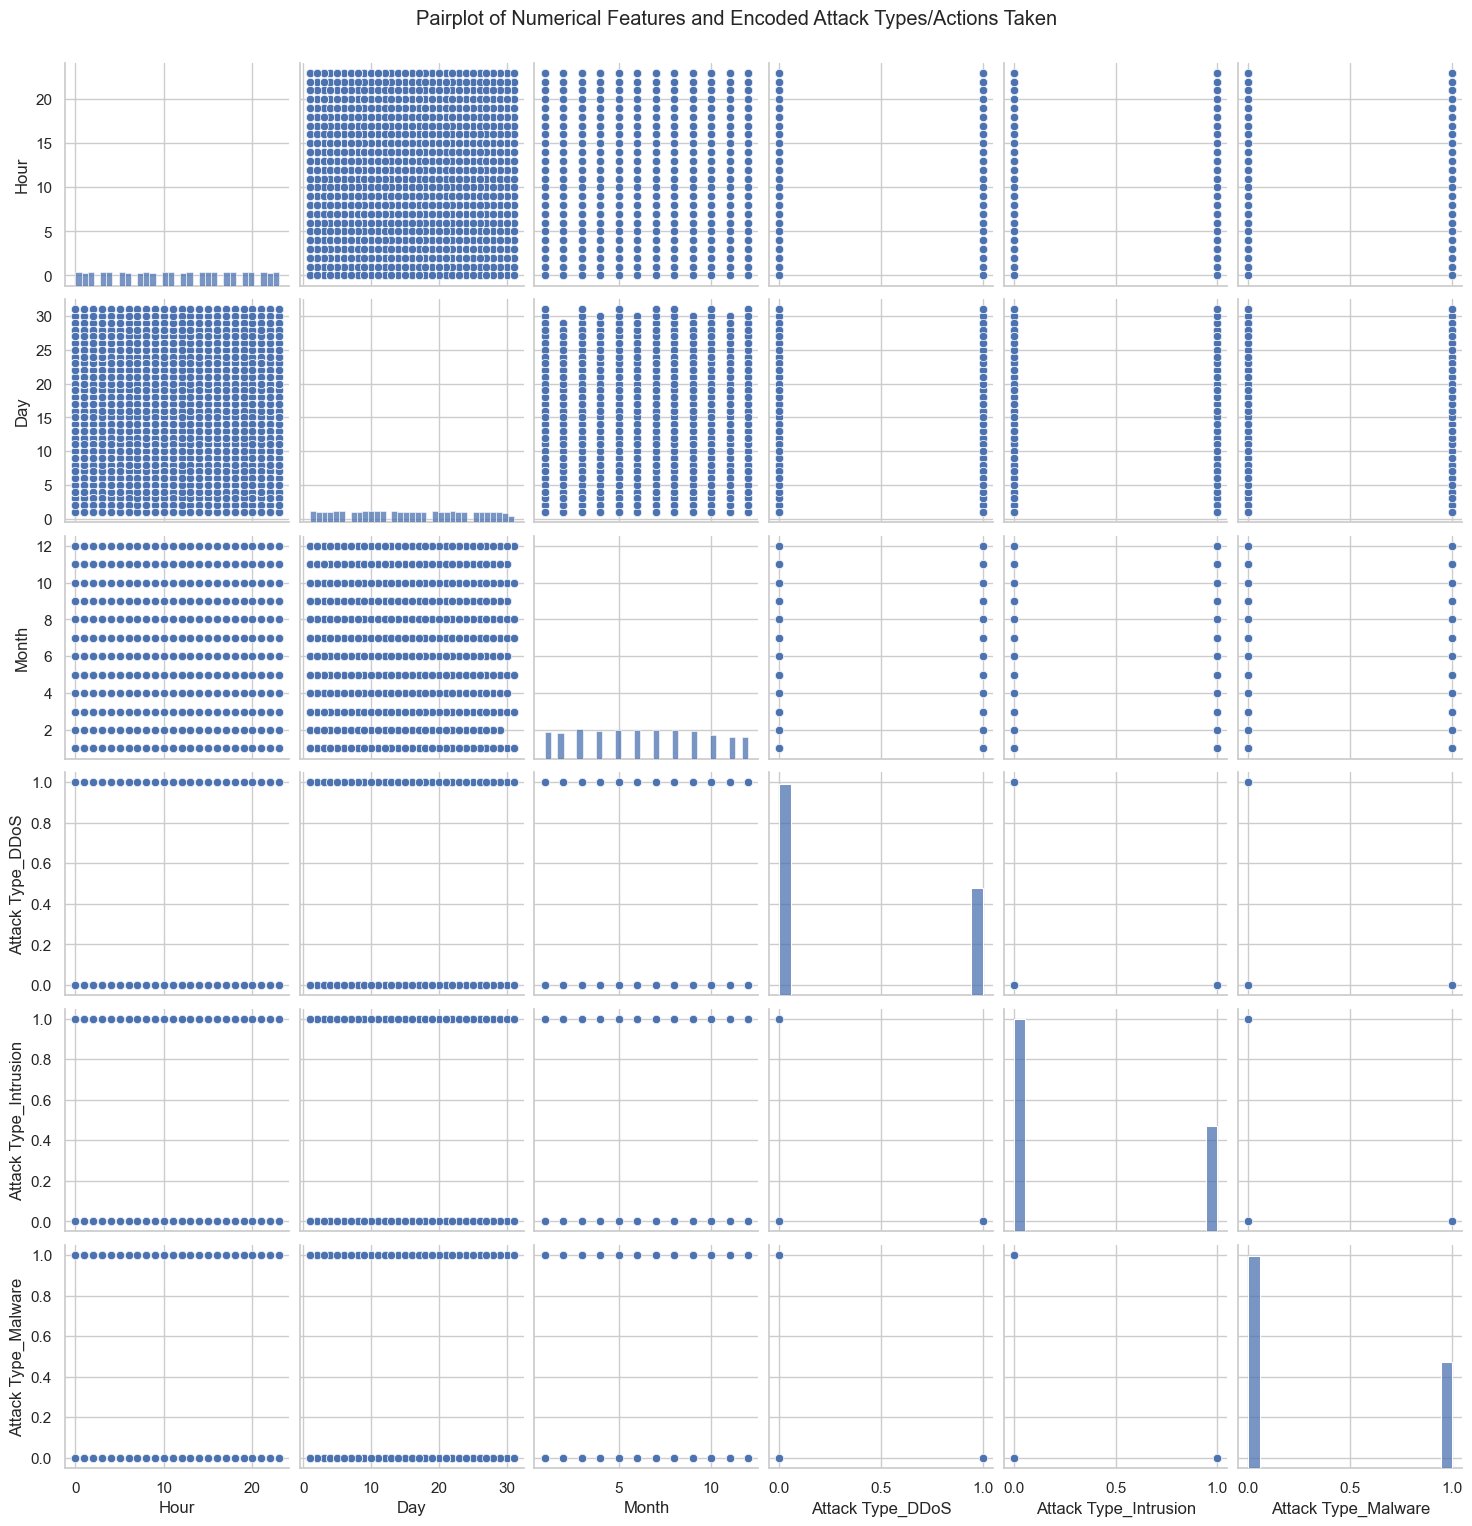

In [43]:
# Plot 5: Pairplot for numerical relationships (hour, day, month) with attack type and action taken
df_encoded = pd.get_dummies(df, columns=['Attack Type', 'Action Taken'])
sns.pairplot(df_encoded[['Hour', 'Day', 'Month'] + list(df_encoded.columns[df_encoded.columns.str.startswith('Attack Type')]) + list(df_encoded.columns[df_encoded.columns.str.startswith('action taken')])])
plt.suptitle('Pairplot of Numerical Features and Encoded Attack Types/Actions Taken', y=1.02)
plt.show()

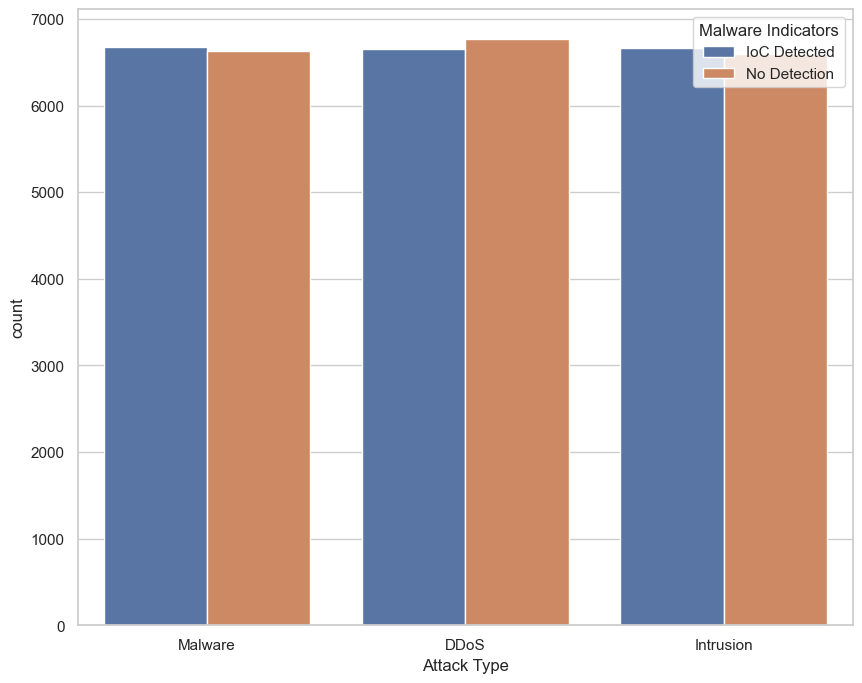

In [44]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x = 'Attack Type', hue = 'Malware Indicators')
plt.show()

In [47]:
# Top N used ports
top_n_ports = 5
top_ports = df['Source Port'].value_counts().head(top_n_ports)

# Print top used ports
print(f"Top {top_n_ports} Used Ports:")
print(top_ports)

Top 5 Used Ports:
Source Port
41341    6
31656    5
8653     5
24528    5
60026    5
Name: count, dtype: int64


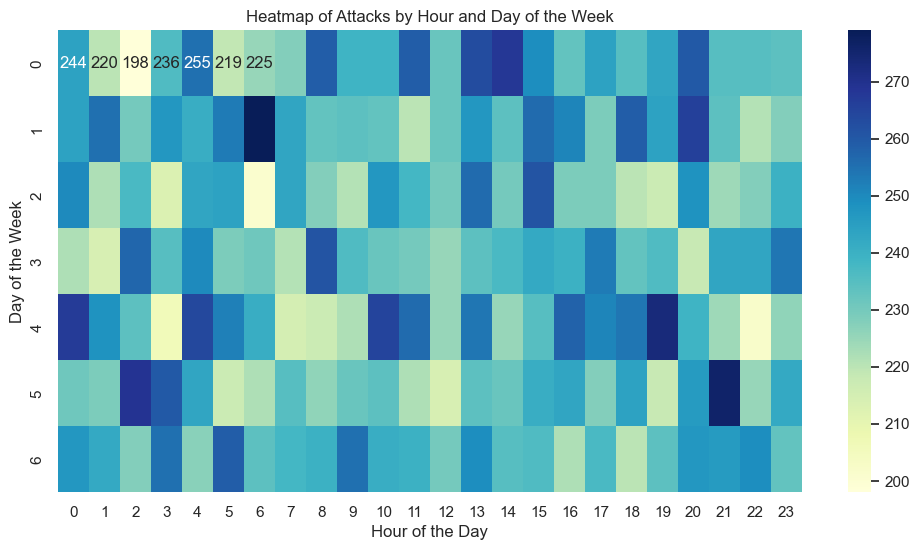

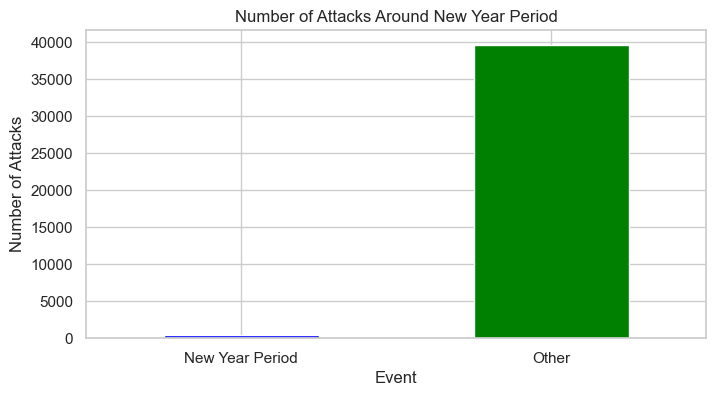

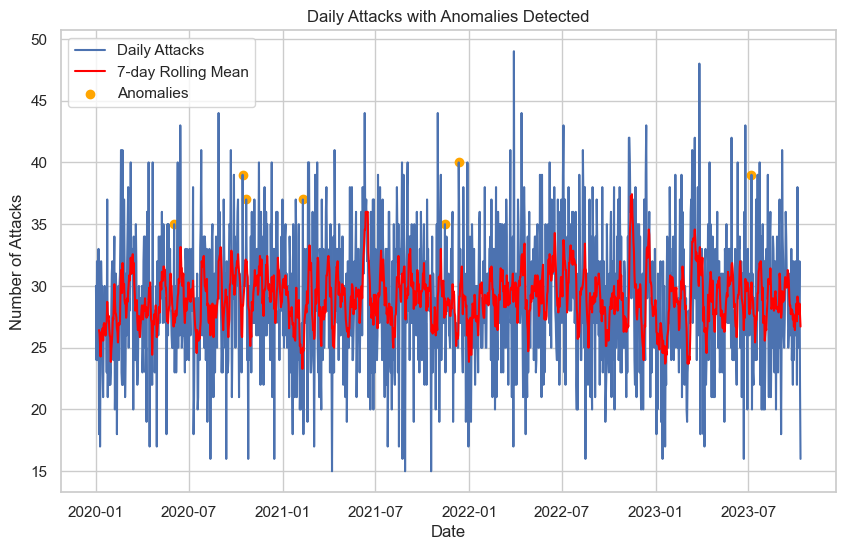

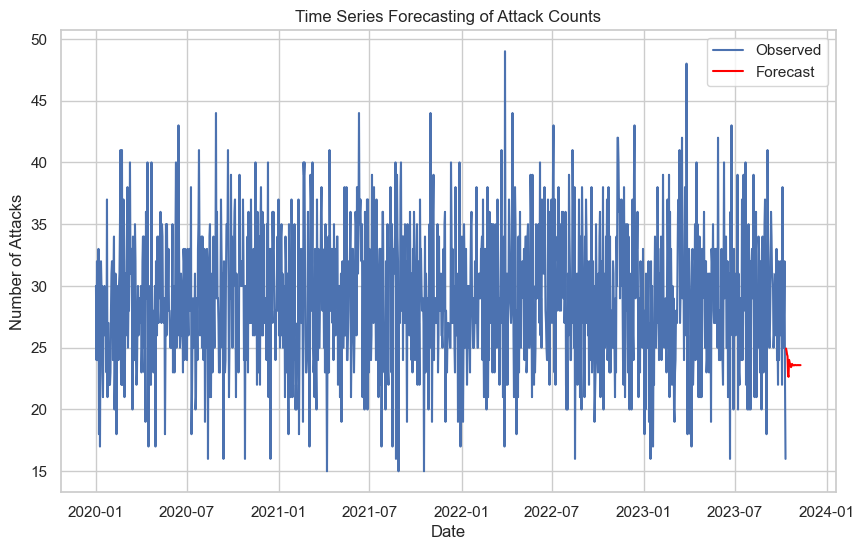

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Sample data generation (replace with your data import)
# df = pd.read_csv('cybersecurity_attacks.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 1. Event-Based Analysis
# Assuming we are analyzing around New Year's Day
# df['Event'] = np.where(df['Timestamp'].dt.month == 1, 'New Year', 'Other')
# New Year period could be from Dec 30 to Jan 2
df['Event'] = np.where((df['Timestamp'].dt.month == 12) & (df['Timestamp'].dt.day >= 30) |
                       (df['Timestamp'].dt.month == 1) & (df['Timestamp'].dt.day <= 2), 
                       'New Year Period', 'Other')
attacks_event_based = df.groupby('Event').size()

# 2. Anomaly Detection
attacks_per_day = df.resample('D', on='Timestamp').size()
rolling_mean = attacks_per_day.rolling(window=7).mean()
rolling_std = attacks_per_day.rolling(window=7).std()
anomalies = attacks_per_day[(attacks_per_day - rolling_mean) > (2 * rolling_std)]

# 3. Time Series Forecasting
model = ARIMA(attacks_per_day, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# 4. Heatmaps
# Heatmap of attacks by hour and day of the week
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
attacks_heatmap = df.pivot_table(index='DayOfWeek', columns='Hour', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(attacks_heatmap, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Heatmap of Attacks by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

# Visualization for the Event-Based Analysis
plt.figure(figsize=(8, 4))
attacks_event_based.plot(kind='bar', color=['blue', 'green'])
plt.title('Number of Attacks Around New Year Period')
plt.xlabel('Event')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=0)
plt.show()

# Visualization for Anomaly Detection
plt.figure(figsize=(10, 6))
plt.plot(attacks_per_day, label='Daily Attacks')
plt.plot(rolling_mean, label='7-day Rolling Mean', color='red')
plt.scatter(anomalies.index, anomalies, color='orange', label='Anomalies')
plt.title('Daily Attacks with Anomalies Detected')
plt.xlabel('Date')
plt.ylabel('Number of Attacks')
plt.legend()
plt.show()

# Visualization for Time Series Forecasting
plt.figure(figsize=(10, 6))
plt.plot(attacks_per_day, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Time Series Forecasting of Attack Counts')
plt.xlabel('Date')
plt.ylabel('Number of Attacks')
plt.legend()
plt.show()

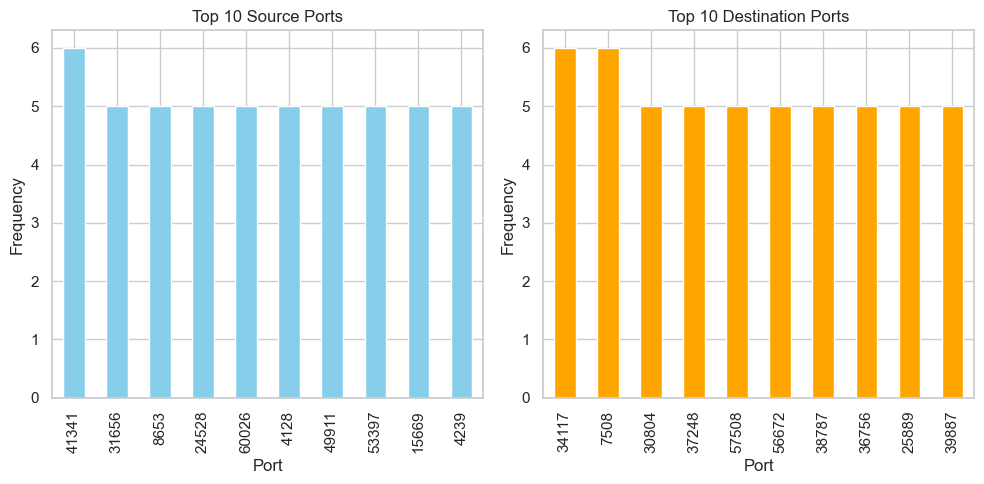

In [52]:
# Count the frequency of source and destination ports
source_port_counts = df['Source Port'].value_counts().head(10)
dest_port_counts = df['Destination Port'].value_counts().head(10)

# Plotting the top source and destination ports
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
source_port_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Source Ports')
plt.xlabel('Port')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
dest_port_counts.plot(kind='bar', color='orange')
plt.title('Top 10 Destination Ports')
plt.xlabel('Port')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [53]:
# Example: Finding unusual high port usage
unusual_ports = df[(df['Source Port'] > 1024) & (df['Destination Port'] > 1024)]